## This a project examining NYC Real Estate data over the past years. The goals of this project are to:
- Determine what the most imortant feature is in regards to predicting sale price
- Finding the best model to predict our test set


### Dataset - we will be using the nyc-property-sales.csv dataset from Kaggle 

In [1]:
# Uploading the dataset and getting insights as to what it looks like

import pandas as pd
import numpy as np

housing = pd.read_csv('nyc-property-sales.csv')

housing

BOROUGH   NEIGHBORHOOD  ... SALE PRICE            SALE DATE
0             1  ALPHABET CITY  ...     399000  2022-09-29 00:00:00
1             1  ALPHABET CITY  ...    2999999  2022-09-15 00:00:00
2             1  ALPHABET CITY  ...   16800000  2022-08-04 00:00:00
3             1  ALPHABET CITY  ...   16800000  2022-08-04 00:00:00
4             1  ALPHABET CITY  ...     158822  2022-09-27 00:00:00
...         ...            ...  ...        ...                  ...
2018044       5        WOODROW  ...    1116638  2022-12-19 00:00:00
2018045       5        WOODROW  ...    1116638  2022-12-19 00:00:00
2018046       5        WOODROW  ...    1116638  2022-12-19 00:00:00
2018047       5        WOODROW  ...    1116638  2022-12-19 00:00:00
2018048       5        WOODROW  ...    5600000  2022-12-19 00:00:00

[2018049 rows x 21 columns]

### Data Preprocessing

In [2]:
# We want homes only in Manhattan and where it is one resedential unit. In the dataset, Manhattan is represented by the number 1
housing = housing[housing['BOROUGH'] == 1]
housing = housing[(housing['RESIDENTIAL UNITS'] == 1) & (housing['COMMERCIAL UNITS'] == 0)]


In [3]:
# We do not need the following columns so we will drop them

columns_to_drop = ['EASE-MENT', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','COMMERCIAL UNITS','TOTAL UNITS','BOROUGH','ADDRESS','BUILDING CLASS CATEGORY','LOT','BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'LAND SQUARE FEET']


housing = housing.drop(columns=columns_to_drop)




housing

NEIGHBORHOOD BLOCK  ... SALE PRICE            SALE DATE
0                   ALPHABET CITY   374  ...     399000  2022-09-29 00:00:00
198                       CHELSEA   719  ...          0  2022-06-06 00:00:00
199                       CHELSEA   720  ...   11100000  2022-06-17 00:00:00
200                       CHELSEA   722  ...          0  2022-03-10 00:00:00
201                       CHELSEA   767  ...    6995000  2022-07-28 00:00:00
...                           ...   ...  ...        ...                  ...
1959507   UPPER WEST SIDE (79-96)  1250  ...   11700000  2023-09-28 00:00:00
1960380  UPPER WEST SIDE (96-116)  1871  ...          0  2023-01-08 00:00:00
1960381  UPPER WEST SIDE (96-116)  1891  ...    5800000  2023-09-15 00:00:00
1960382  UPPER WEST SIDE (96-116)  1892  ...          0  2023-03-17 00:00:00
1961074  WASHINGTON HEIGHTS UPPER  2170  ...    1000000  2023-06-27 00:00:00

[148775 rows x 9 columns]

In [4]:
#Checking to see how many zeros are in the following columns

print(housing.isna().sum())


NEIGHBORHOOD            0
BLOCK                   0
APARTMENT NUMBER      970
 ZIP CODE               0
RESIDENTIAL UNITS       0
GROSS SQUARE FEET       0
YEAR BUILT           2642
SALE PRICE              0
SALE DATE               0
dtype: int64


In [5]:
# Here we are going to drop the rows in the dataset that dont have a value for year built or that have year built equal 0. We want to create a new column "age of building" which comes from year built

housing = housing.dropna(subset= ["YEAR BUILT"])

housing = housing[housing['YEAR BUILT'] != 0]

housing['AGE OF BUILDING'] = 2024 - housing['YEAR BUILT']



housing

NEIGHBORHOOD BLOCK  ...            SALE DATE AGE OF BUILDING
0                   ALPHABET CITY   374  ...  2022-09-29 00:00:00           124.0
198                       CHELSEA   719  ...  2022-06-06 00:00:00           124.0
199                       CHELSEA   720  ...  2022-06-17 00:00:00           123.0
200                       CHELSEA   722  ...  2022-03-10 00:00:00           114.0
201                       CHELSEA   767  ...  2022-07-28 00:00:00           114.0
...                           ...   ...  ...                  ...             ...
1959507   UPPER WEST SIDE (79-96)  1250  ...  2023-09-28 00:00:00           124.0
1960380  UPPER WEST SIDE (96-116)  1871  ...  2023-01-08 00:00:00           125.0
1960381  UPPER WEST SIDE (96-116)  1891  ...  2023-09-15 00:00:00           125.0
1960382  UPPER WEST SIDE (96-116)  1892  ...  2023-03-17 00:00:00           119.0
1961074  WASHINGTON HEIGHTS UPPER  2170  ...  2023-06-27 00:00:00           123.0

[107453 rows x 10 columns]

In [6]:
# Checking N/A's again - this time only in the Apartment number column

print(housing.isna().sum())

NEIGHBORHOOD           0
BLOCK                  0
APARTMENT NUMBER     960
 ZIP CODE              0
RESIDENTIAL UNITS      0
GROSS SQUARE FEET      0
YEAR BUILT             0
SALE PRICE             0
SALE DATE              0
AGE OF BUILDING        0
dtype: int64


In [7]:
# Want to check how many rows in dataset have gross square feet that is not equal to zero

Gross_sq_ft_zeros = (housing['GROSS SQUARE FEET'] != 0).sum()

Gross_sq_ft_zeros

8608

In [8]:
# will get rid of Gross Feet = 0 - this is impossible for an apartment

housing = housing[housing['GROSS SQUARE FEET'] != 0]

housing

NEIGHBORHOOD BLOCK  ...            SALE DATE AGE OF BUILDING
0                   ALPHABET CITY   374  ...  2022-09-29 00:00:00           124.0
198                       CHELSEA   719  ...  2022-06-06 00:00:00           124.0
199                       CHELSEA   720  ...  2022-06-17 00:00:00           123.0
200                       CHELSEA   722  ...  2022-03-10 00:00:00           114.0
201                       CHELSEA   767  ...  2022-07-28 00:00:00           114.0
...                           ...   ...  ...                  ...             ...
1959507   UPPER WEST SIDE (79-96)  1250  ...  2023-09-28 00:00:00           124.0
1960380  UPPER WEST SIDE (96-116)  1871  ...  2023-01-08 00:00:00           125.0
1960381  UPPER WEST SIDE (96-116)  1891  ...  2023-09-15 00:00:00           125.0
1960382  UPPER WEST SIDE (96-116)  1892  ...  2023-03-17 00:00:00           119.0
1961074  WASHINGTON HEIGHTS UPPER  2170  ...  2023-06-27 00:00:00           123.0

[8608 rows x 10 columns]

In [9]:
# Since there are so many different formats for apartments numbers and names, we will only take the format of number - letter. We will use this for floor number. 

housing = housing[housing['APARTMENT NUMBER'].str.match(r'^\d[A-Za-z]$', na=False)]

housing

NEIGHBORHOOD BLOCK  ...            SALE DATE AGE OF BUILDING
18516     UPPER WEST SIDE (59-79)  1163  ...  2022-09-22 00:00:00            16.0
202727    UPPER WEST SIDE (59-79)  1185  ...  2020-03-04 00:00:00           124.0
345144              ALPHABET CITY   378  ...  2018-07-25 00:00:00            10.0
345145              ALPHABET CITY   378  ...  2018-10-09 00:00:00            10.0
345146              ALPHABET CITY   392  ...  2018-09-18 00:00:00            96.0
...                           ...   ...  ...                  ...             ...
361876   WASHINGTON HEIGHTS UPPER  2179  ...  2018-07-12 00:00:00            37.0
361877   WASHINGTON HEIGHTS UPPER  2179  ...  2018-06-27 00:00:00            37.0
361878   WASHINGTON HEIGHTS UPPER  2179  ...  2018-12-12 00:00:00            37.0
361879   WASHINGTON HEIGHTS UPPER  2179  ...  2018-12-12 00:00:00            37.0
1839581   UPPER WEST SIDE (59-79)  1163  ...  2022-09-22 00:00:00            16.0

[2032 rows x 10 columns]

In [10]:
# creating floor column - we dont need Apartment number anymore

housing['FLOOR'] = housing['APARTMENT NUMBER'].str.extract(r'(\d)')[0].astype(int)

housing

NEIGHBORHOOD BLOCK  ... AGE OF BUILDING FLOOR
18516     UPPER WEST SIDE (59-79)  1163  ...            16.0     7
202727    UPPER WEST SIDE (59-79)  1185  ...           124.0     1
345144              ALPHABET CITY   378  ...            10.0     2
345145              ALPHABET CITY   378  ...            10.0     3
345146              ALPHABET CITY   392  ...            96.0     6
...                           ...   ...  ...             ...   ...
361876   WASHINGTON HEIGHTS UPPER  2179  ...            37.0     4
361877   WASHINGTON HEIGHTS UPPER  2179  ...            37.0     8
361878   WASHINGTON HEIGHTS UPPER  2179  ...            37.0     8
361879   WASHINGTON HEIGHTS UPPER  2179  ...            37.0     1
1839581   UPPER WEST SIDE (59-79)  1163  ...            16.0     7

[2032 rows x 11 columns]

In [11]:
# Getting rid of columns that we do not need any longer;  We are getting rid of neighbordhood because there a too many for preprocessing

housing = housing.drop(['RESIDENTIAL UNITS', 'APARTMENT NUMBER', 'YEAR BUILT', 'NEIGHBORHOOD'], axis=1)

housing


BLOCK  ZIP CODE  ... AGE OF BUILDING FLOOR
18516    1163   10023.0  ...            16.0     7
202727   1185   10023.0  ...           124.0     1
345144    378   10009.0  ...            10.0     2
345145    378   10009.0  ...            10.0     3
345146    392   10009.0  ...            96.0     6
...       ...       ...  ...             ...   ...
361876   2179   10040.0  ...            37.0     4
361877   2179   10040.0  ...            37.0     8
361878   2179   10040.0  ...            37.0     8
361879   2179   10040.0  ...            37.0     1
1839581  1163   10023.0  ...            16.0     7

[2032 rows x 7 columns]

In [12]:
# We want to adjust the date so we can pull out information on Year and Month and see if it affects price

housing['SALE DATE'] = pd.to_datetime(housing['SALE DATE'])
housing['Year'] = housing['SALE DATE'].dt.year
housing['Month'] = housing['SALE DATE'].dt.month
housing = housing.drop('SALE DATE', axis=1)

housing


BLOCK  ZIP CODE GROSS SQUARE FEET  ... FLOOR  Year  Month
18516    1163   10023.0             714.0  ...     7  2022      9
202727   1185   10023.0            7200.0  ...     1  2020      3
345144    378   10009.0             481.0  ...     2  2018      7
345145    378   10009.0             733.0  ...     3  2018     10
345146    392   10009.0             640.0  ...     6  2018      9
...       ...       ...               ...  ...   ...   ...    ...
361876   2179   10040.0             905.0  ...     4  2018      7
361877   2179   10040.0             983.0  ...     8  2018      6
361878   2179   10040.0             777.0  ...     8  2018     12
361879   2179   10040.0             833.0  ...     1  2018     12
1839581  1163   10023.0             714.0  ...     7  2022      9

[2032 rows x 8 columns]

In [13]:
# There are some rows that have sale price = 0; We need to pull them out because, well, sale price cannot be equal to zero

housing = housing[housing['SALE PRICE'] != 0]

housing

BLOCK  ZIP CODE GROSS SQUARE FEET  ... FLOOR  Year  Month
18516    1163   10023.0             714.0  ...     7  2022      9
202727   1185   10023.0            7200.0  ...     1  2020      3
345144    378   10009.0             481.0  ...     2  2018      7
345145    378   10009.0             733.0  ...     3  2018     10
345146    392   10009.0             640.0  ...     6  2018      9
...       ...       ...               ...  ...   ...   ...    ...
361592   2111   10032.0             618.0  ...     8  2018      9
361595   2134   10032.0             949.0  ...     3  2018     12
361597   2134   10032.0            1073.0  ...     6  2018      8
361876   2179   10040.0             905.0  ...     4  2018      7
1839581  1163   10023.0             714.0  ...     7  2022      9

[1619 rows x 8 columns]

In [14]:
# Here, we want to change the following columns to be numeric, because they were listed as objects

housing['BLOCK'] = pd.to_numeric(housing['BLOCK'], errors='coerce')
housing['GROSS SQUARE FEET'] = pd.to_numeric(housing['GROSS SQUARE FEET'], errors='coerce')
housing['AGE OF BUILDING'] = pd.to_numeric(housing['AGE OF BUILDING'], errors='coerce')
housing['SALE PRICE'] = pd.to_numeric(housing['SALE PRICE'], errors='coerce')
housing[' ZIP CODE'] = pd.to_numeric(housing[' ZIP CODE'], errors='coerce')

In [15]:
# we can see that all of the columns are in numeric - type columns

print(housing.dtypes)

BLOCK                  int64
 ZIP CODE            float64
GROSS SQUARE FEET    float64
SALE PRICE             int64
AGE OF BUILDING      float64
FLOOR                  int64
Year                   int32
Month                  int32
dtype: object


In [16]:
# Seeing how many columns in the data set have 0's and if so, how many

print(housing.isna().sum())

BLOCK                0
 ZIP CODE            0
GROSS SQUARE FEET    0
SALE PRICE           0
AGE OF BUILDING      0
FLOOR                0
Year                 0
Month                0
dtype: int64


In [17]:
# Now we can begin to separate our features columns from our target column 

features = housing.drop(columns=['SALE PRICE'])

features

BLOCK   ZIP CODE  GROSS SQUARE FEET  ...  FLOOR  Year  Month
18516     1163    10023.0              714.0  ...      7  2022      9
202727    1185    10023.0             7200.0  ...      1  2020      3
345144     378    10009.0              481.0  ...      2  2018      7
345145     378    10009.0              733.0  ...      3  2018     10
345146     392    10009.0              640.0  ...      6  2018      9
...        ...        ...                ...  ...    ...   ...    ...
361592    2111    10032.0              618.0  ...      8  2018      9
361595    2134    10032.0              949.0  ...      3  2018     12
361597    2134    10032.0             1073.0  ...      6  2018      8
361876    2179    10040.0              905.0  ...      4  2018      7
1839581   1163    10023.0              714.0  ...      7  2022      9

[1619 rows x 7 columns]

In [18]:
# Here we are getting our target column - sale price

target = housing['SALE PRICE']

target

18516       1330000
202727     10625000
345144       732376
345145      1016213
345146        33159
             ...   
361592       638000
361595       702592
361597       807300
361876       525000
1839581     1330000
Name: SALE PRICE, Length: 1619, dtype: int64

## Here we are Splitting our data into training and testing for the model

In [19]:
# Here we are doing our training and testing split for our model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(X_train)

        BLOCK   ZIP CODE  GROSS SQUARE FEET  ...  FLOOR  Year  Month
349842   2034    10039.0              361.0  ...      1  2018      6
349007    608    10011.0             1313.0  ...      2  2018     10
354672    484    10012.0             2133.0  ...      5  2018      8
358244   1515    10128.0              581.0  ...      8  2018     12
348427    561    10003.0             1334.0  ...      2  2018     10
...       ...        ...                ...  ...    ...   ...    ...
355081     16    10280.0              634.0  ...      8  2018     12
356865   1461    10065.0              496.0  ...      5  2018     10
351568   1846    10026.0              589.0  ...      2  2018      2
359553   1152    10023.0              719.0  ...      9  2018      6
355077     16    10280.0              646.0  ...      3  2018      9

[1295 rows x 7 columns]


In [20]:
print(X_test)

        BLOCK   ZIP CODE  GROSS SQUARE FEET  ...  FLOOR  Year  Month
345920    292    10002.0              513.0  ...      6  2018      8
349615   1736    10037.0             1005.0  ...      2  2018     12
360957   1252    10025.0             1130.0  ...      1  2018     10
349794   2033    10039.0             1001.0  ...      6  2018      4
358300   1527    10028.0              897.0  ...      9  2018     10
...       ...        ...                ...  ...    ...   ...    ...
346583    439    10009.0              934.0  ...      4  2018      2
354630    594    10013.0             1662.0  ...      2  2018      8
346758    831    10001.0              696.0  ...      6  2018      7
349723   1908    10027.0             1260.0  ...      1  2018      5
356941   1487    10021.0              357.0  ...      3  2018      3

[324 rows x 7 columns]


In [21]:
print(y_train)

349842     380000
349007    2120614
354672    3950000
358244     625000
348427    2500000
           ...   
355081     580000
356865     660000
351568     307000
359553    1020000
355077     537000
Name: SALE PRICE, Length: 1295, dtype: int64


In [22]:
print(y_test)

345920     810000
349615     870000
360957    1300000
349794     825000
358300    1300000
           ...   
346583    1776846
354630    2050000
346758    1377737
349723    1145200
356941     485000
Name: SALE PRICE, Length: 324, dtype: int64


In [23]:
print(X_train.isnull().sum())

BLOCK                0
 ZIP CODE            0
GROSS SQUARE FEET    0
AGE OF BUILDING      0
FLOOR                0
Year                 0
Month                0
dtype: int64


In [24]:
print(y_train.isnull().sum())

0


In [25]:
print(X_train.dtypes)

BLOCK                  int64
 ZIP CODE            float64
GROSS SQUARE FEET    float64
AGE OF BUILDING      float64
FLOOR                  int64
Year                   int32
Month                  int32
dtype: object


## Model Implementation

In [26]:
# Here we are importing random forest regressor and some metrics we will use to judge model performance. We will also train the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Y_pred will see what the predictions will be for the model

y_pred = model.predict(X_test)

In [28]:
# These are the metrics I will use to see how the model is doing - mean squared error and r squared

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

In [29]:
# values - These are not the best values, especially the R^2 which is pretty low at .4

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 1861055696832.0393
R-squared (R²): 0.3976


## Below it is saying 80% of what is predicting sale price is the 3rd feature which is gross square feet

In [30]:
# Seeing what the most important feautures are - when it comes to prediciting sale price

print(model.feature_importances_)

[4.52326448e-02 2.86483482e-02 8.19264025e-01 5.27384521e-02
 3.23800888e-02 1.67149251e-05 2.17197262e-02]


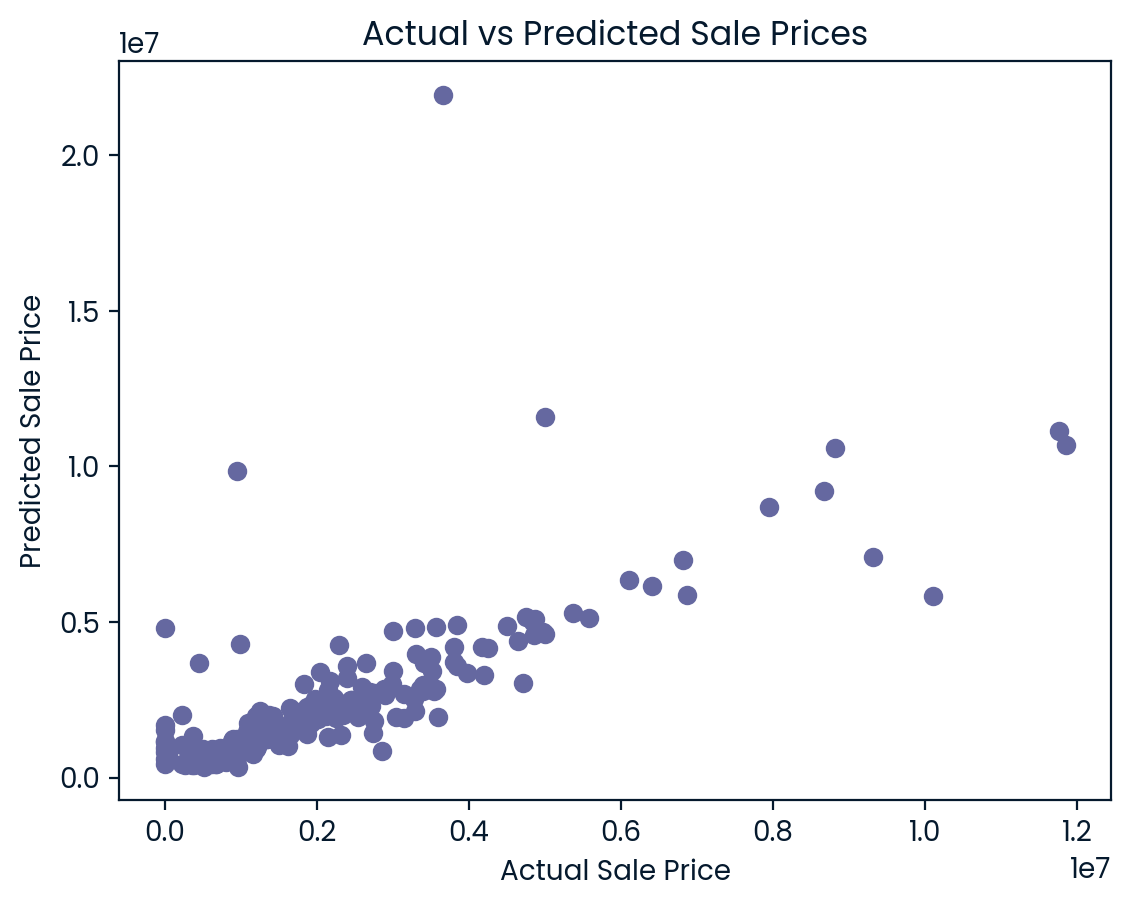

In [31]:
# A plot of Actual vs predicted Sale prices

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

In [32]:
# Here, we are trying another model - XGBoost

from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42)
model3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [33]:
y_pred_xgb = model3.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [34]:
# we get our new values, MSE has gone down and R^2 has gone up significantly to .65

print(f"MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")

MSE: 1074166551322.1157, R²: 0.6523


In [35]:
# We still see that Gross Square Feet is the most important feature when it comes to preedicting with a values of 64%

print(model3.feature_importances_)

[0.1258531  0.03753339 0.64485884 0.10927258 0.06263656 0.00472987
 0.01511564]


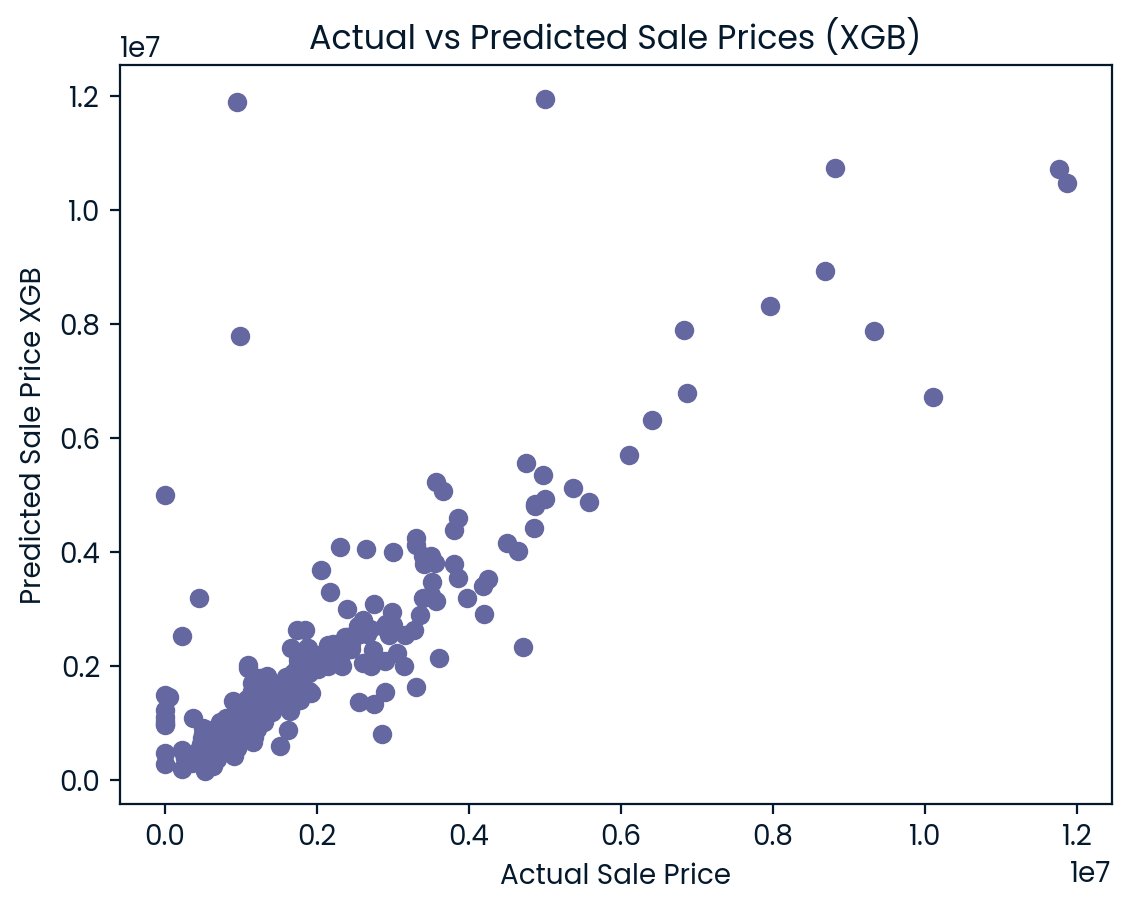

In [36]:
# Here we can see that the values are more equal

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price XGB')
plt.title('Actual vs Predicted Sale Prices (XGB)')
plt.show()

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(model3, features, target, cv=15, scoring='r2')
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean R²: {scores.mean()}")

Cross-Validation R² Scores: [ 0.78188725  0.76760758 -0.05541095 -2.7945772   0.5884289   0.10435763
  0.7172826   0.49983912  0.15371256  0.76571805 -0.8332154   0.58612971
  0.31599621  0.86734103 -0.43755032]
Mean R²: 0.13516978456435733


In [40]:
# I want to find the best parameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(features, target)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation R²: ", grid_search.best_score_)

Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation R²:  0.5613550273373968


### Below we can see that our XGB Regressor Tuned Model has and R^ of .7732 - our best score. It also has the lowest MSE. 

In [41]:
# Initial XGB - Model vs XGB Tuned Model - The tuned model perfomrs better

# For initial model
y_pred_xgb_default = model3.predict(X_test)
mse_xgb_default = mean_squared_error(y_test, y_pred_xgb_default)
r2_xgb_default = r2_score(y_test, y_pred_xgb_default)
print(f"Initial Model - MSE: {mse_xgb_default:.4f}, R²: {r2_xgb_default:.4f}")

# For tuned model
y_pred_xgb_tuned = grid_search.best_estimator_.predict(X_test)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
print(f"Tuned Model - MSE: {mse_xgb_tuned:.4f}, R²: {r2_xgb_tuned:.4f}")

Initial Model - MSE: 1074166551322.1157, R²: 0.6523
Tuned Model - MSE: 700826229335.9478, R²: 0.7732


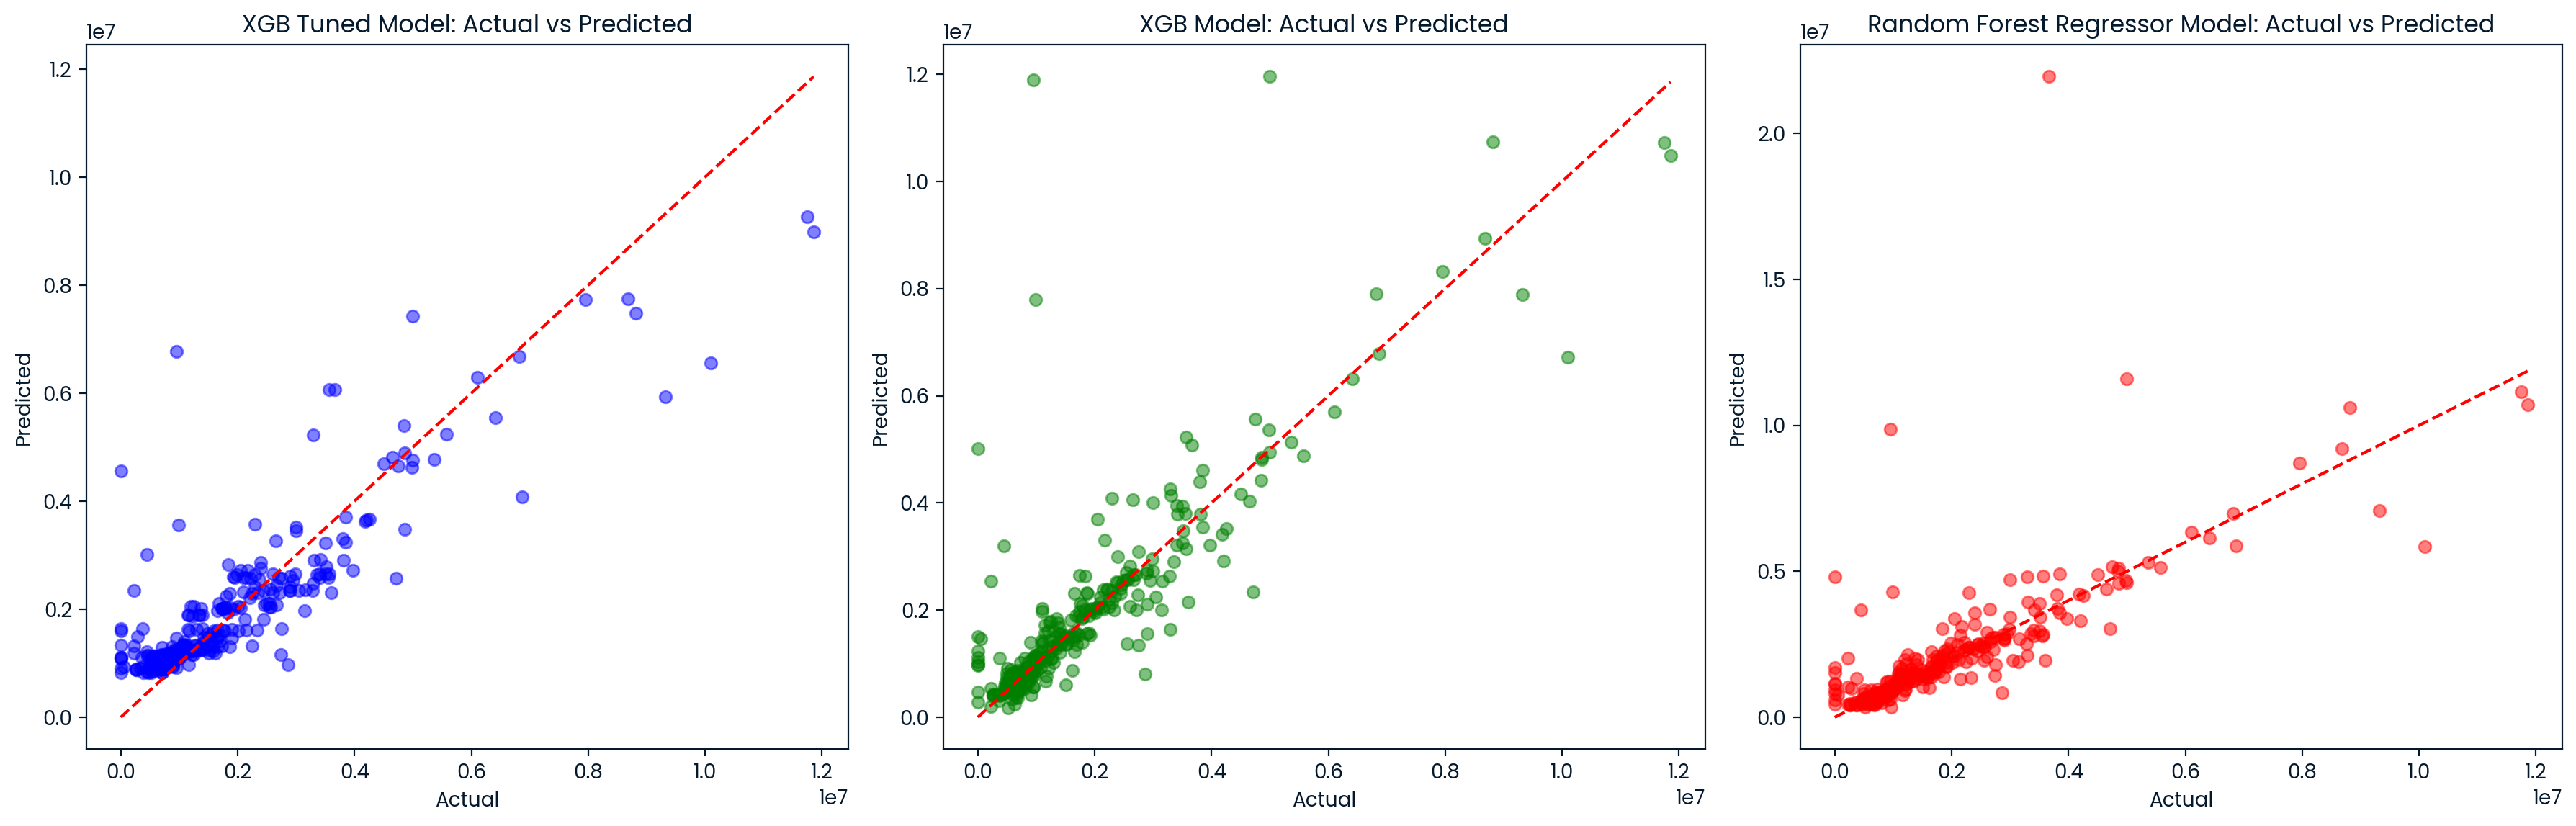

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Untuned Model
ax[0].scatter(y_test, y_pred_xgb_tuned, color='blue', alpha=0.5)
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
ax[0].set_title('XGB Tuned Model: Actual vs Predicted')
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')

# Tuned Model
ax[1].scatter(y_test, y_pred_xgb, color='green', alpha=0.5)
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
ax[1].set_title('XGB Model: Actual vs Predicted')
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')

# Tuned Model
ax[2].scatter(y_test, y_pred, color='red', alpha=0.5)
ax[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
ax[2].set_title('Random Forest Regressor Model: Actual vs Predicted')
ax[2].set_xlabel('Actual')
ax[2].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

### Final thoughts - our best feauture to predict sales price is gross square feet. Some Encoding may be needed on Zip Code and Block. We found a good model in the in (XGB Regressor Tuned) but this model may be overfitting as we can see from the above plot. There are still some points far away from line. 